In [1]:
import pickle, os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from cv_paper_plots import accuracy, slope, analysis

from cv_paper_plots.style import letter_fontstyle

from importlib import reload

In [2]:
subjects = ['ec2', 'ec9', 'gp31', 'gp33']

In [3]:
with open(os.path.join(os.environ['HOME'], 'plots/model/data/frac_results.pkl'), 'rb') as f:
    deep_all, linear_all, _ = pickle.load(f, encoding='latin1')

d = np.load(os.path.join(os.environ['HOME'], 'plots/ds/data/dataset_chance.npz'))
chance = d['chance_data']
training_size = d['training_size']

In [4]:
other_linear_accuracy = {}
other_deep_accuracy = {}
for key in ['c', 'v', 'p', 'm']:
    other_linear_accuracy[key] = np.zeros((len(subjects), 3, 10))
    other_deep_accuracy[key] = np.zeros((len(subjects), 3, 10))
for ii, s in enumerate(subjects):
    for style in ['_lin', '']:
        f_string = 'plots/model/data/{}_{}_hg_a{}_model_output.pkl'.format(s, s, style)
        with open(os.path.join(os.environ['HOME'], f_string), 'rb') as f:
            dicts, dicts2, y_dims, has_data = pickle.load(f, encoding='latin1')
        indices_dicts2, y_hat_dicts2, logits_dicts2 = dicts2
        mats = analysis.indx_dict2conf_mat(indices_dicts2, y_dims)
        c_mat, v_mat, cv_mat = mats
        acc = analysis.conf_mat2accuracy(c_mat, v_mat, cv_mat)
        (c_accuracy, v_accuracy, cv_accuracy, accuracy_per_cv,
         p_accuracy, m_accuracy) = acc
        if style == '_lin':
            d = other_linear_accuracy
        else:
            d = other_deep_accuracy
        d['c'][ii, 2] = c_accuracy
        d['v'][ii, 2] = v_accuracy
        d['p'][ii, 2] = p_accuracy
        d['m'][ii, 2] = m_accuracy

In [5]:
fracs = sorted(deep_all.keys())

# CV Accuracy

Subject 1: p=0.020248128505071458, 0.020020297611620892, 0.020248128505071458
ec2: p=0.0076
Subject 2: p=1.039897974842047, 0.019681255937770058, 0.019345461727454785


/home/jesse/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2385: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


ec9: p=1.3956
Subject 3: p=0.020248128505071458, 0.020134032802424998, 0.020134032802424998
gp31: p=0.0068
Subject 4: p=0.020248128505071458, 0.020134032802424998, 0.020134032802424998
gp33: p=0.0088
all subject: p=1.4069613793016899e-06
The highest deep network accuracy for a single subject on the consonant vowel task is for Subject 1 which is 38.3$\pm$ 2.9\% (21.7 times chance, 1.8\%) and 23.6$\pm$ 2.1\% (13.4 times chance, 1.8\%) for logistic regression and deep networks respectively, which is a 63.1\% improvement. Mean consonant vowel classification accuracy across subjects (XX way) with deep networks is 19.9 $\pm$ 12.6\%. For logistic regression, it is 13.1 $\pm$ 7.4\%.
Subject 1: p=0.020248128505071458, 0.019681255937770058, 0.020134032802424998
ec2: p=0.0064
Subject 2: p=1.0462889440557972, 0.019906923016855746, 0.020020297611620892
ec9: p=0.7976
Subject 3: p=0.01912340400473537, 0.020134032802424998, 0.020134032802424998
gp31: p=0.01
Subject 4: p=0.037009782414134225, 0.0200202

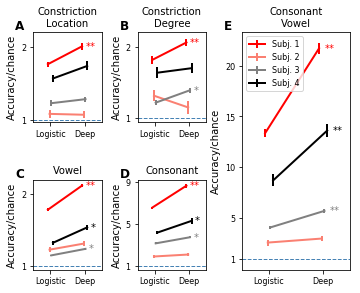

In [9]:
reload(accuracy)
reload(slope)
plt.close()
f = plt.figure(figsize=(5, 4))

le = .1
re = .02
te = .1
be = .075
h_gap = .1
v_gap = .2

cv_w = .3
big_h = (1. - te - be)
little_h = (1. - te - be - v_gap) / 2.
w = (1. - le - cv_w - h_gap - h_gap - re) / 2.

p_m_y = be + little_h + v_gap
ax_p = f.add_axes([le, p_m_y, w, little_h])
ax_m = f.add_axes([le + w + h_gap, p_m_y, w, little_h])

ax_v = f.add_axes([le, be, w, little_h])
ax_c = f.add_axes([le + w + h_gap, be, w, little_h])

ax_cv = f.add_axes([1. - re - cv_w, be, cv_w, big_h])

key = fracs[-1]

accuracy.plot_cv_accuracy(subjects, deep_all[key], linear_all[key], chance[0, :, -1], ax_cv, legend=True)

accuracy.plot_cv_accuracy(subjects, other_deep_accuracy['c'], other_linear_accuracy['c'],
                          chance[1, :, -1], ax_c, 'Consonant', False, ymax=9.2)
accuracy.plot_cv_accuracy(subjects, other_deep_accuracy['v'], other_linear_accuracy['v'],
                          chance[2, :, -1], ax_v, 'Vowel', False, ymax=2.2)

accuracy.plot_cv_accuracy(subjects, other_deep_accuracy['p'], other_linear_accuracy['p'],
                          chance[3, :, -1], ax_p, 'Constriction\nLocation', False, ymax=2.2)
accuracy.plot_cv_accuracy(subjects, other_deep_accuracy['m'], other_linear_accuracy['m'],
                          chance[4, :, -1], ax_m, 'Constriction\nDegree', False, ymax=2.2)

x0 = le - .05
y0 = p_m_y + little_h + .01
x1 = le + w + h_gap - .05
y1 = be + little_h + .01
x2 = 1. - re - cv_w - .05

f.text(x0, y0, 'A', **letter_fontstyle)
f.text(x1, y0, 'B', **letter_fontstyle)
f.text(x0, y1, 'C', **letter_fontstyle)
f.text(x1, y1, 'D', **letter_fontstyle)
f.text(x2, y0, 'E', **letter_fontstyle)

plt.savefig(os.path.join(os.environ['HOME'], 'Downloads/accuracy.pdf'))
plt.savefig(os.path.join(os.environ['HOME'], 'Downloads/accuracy.png'), dpi=300)

# CV Slope

Subject 1: p=0.020248128505071458
Subject 1: p=0.0084
Subject 2: p=1.13801079164483
Subject 2: p=0.8672
Subject 3: p=0.05006127476029589
Subject 3: p=0.0256
Subject 4: p=0.113667456699455
Subject 4: p=0.0924
all subjects: p=0.000260689757898597
Deep networks scale better with dataset size than logistic regresion with an improvement of 5.1 $\pm$ 4.5  and 2.6 $\pm$ 2.8 over chance per 1000 training samples respectively. This improvement is summarized across subjects in Fig \ref{fig:slope}B. For the subject with highest accuracy (Subject 1), the change in accuracy over chance per 1000 training examples for deep networks and logistic regression are 6.5 $\pm$ 1.7 and 3.2 $\pm$ 1.3 respectively. For the subject with highest slope (Subject 4), the change in accuracy over chance per 1000 training examples for deep networks and logistic regression are 10.9 $\pm$ 3.9 and 5.6 $\pm$ 3.1 respectively.


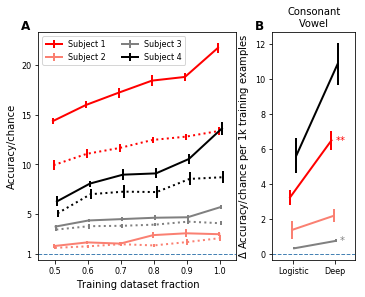

In [11]:
reload(accuracy)
reload(slope)
plt.close()
f = plt.figure(figsize=(5, 4))

le = .1
re = .02
te = .1
be = .11
h_gap = .1

w = .55
h = 1. - te - be

ax_lines = f.add_axes([le, be, w, h])
ax_slopes = f.add_axes([le + w + h_gap, be, 1. - w - h_gap - le - re, h])

key = fracs[-1]

slope.plot_cv_slope(subjects, deep_all, linear_all, chance[0], training_size, fracs, (ax_lines, ax_slopes),
                    legend=True)

x0 = .05
y0 = 1. - te + .01
x1 = le + w + h_gap - .05

f.text(x0, y0, 'A', **letter_fontstyle)
f.text(x1, y0, 'B', **letter_fontstyle)

plt.savefig(os.path.join(os.environ['HOME'], 'Downloads/slope.pdf'))
plt.savefig(os.path.join(os.environ['HOME'], 'Downloads/slope.png'), dpi=300)